In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
# MSZoning: Identifies the general zoning classification of the sale.
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access to property
# Alley: Type of alley access to property
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to various conditions
# Condition2: Proximity to various conditions (if more than one is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Evaluates the quality of the material on the exterior 
# ExterCond: Evaluates the present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Evaluates the height of the basement
# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Rating of basement finished area (if multiple types)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
# Kitchen: Kitchens above grade
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality (Assume typical unless deductions are warranted)
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)
# SaleType: Type of sale
# SaleCondition: Condition of sale

In [4]:
pd.set_option('display.max_columns', None)
pd. set_option('display.max_rows', None)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train.shape

(1460, 81)

In [8]:
test.shape

(1459, 80)

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
train.drop(['PoolQC'],axis=1, inplace=True)
train.drop(['FireplaceQu'],axis=1, inplace=True)
train.drop(['Fence'],axis=1, inplace=True)
train.drop(['MiscFeature'],axis=1, inplace=True)
train.drop(['Alley'],axis=1, inplace=True)
train.drop(['GarageYrBlt'],axis=1, inplace=True)
train.drop(['GarageFinish'],axis=1, inplace=True)
train.drop(['MoSold'],axis=1, inplace=True)

In [13]:
train.shape

(1460, 73)

In [14]:
test.drop(['PoolQC'],axis=1, inplace=True)
test.drop(['FireplaceQu'],axis=1, inplace=True)
test.drop(['Fence'],axis=1, inplace=True)
test.drop(['MiscFeature'],axis=1, inplace=True)
test.drop(['Alley'],axis=1, inplace=True)
test.drop(['GarageYrBlt'],axis=1, inplace=True)
test.drop(['GarageFinish'],axis=1, inplace=True)
test.drop(['MoSold'],axis=1, inplace=True)

In [15]:
test.shape

(1459, 72)

In [16]:
# Finding the null values columnwise
na_vals = train.isna().sum()
na_cols = na_vals.drop(na_vals[na_vals==0].index).sort_values(ascending=False)

na_cols

LotFrontage     259
GarageType       81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [17]:
na_test_vals = test.isna().sum()
na_test_cols = na_test_vals.drop(na_test_vals[na_test_vals==0].index).sort_values(ascending=False)

na_test_cols

LotFrontage     227
GarageCond       78
GarageQual       78
GarageType       76
BsmtCond         45
BsmtExposure     44
BsmtQual         44
BsmtFinType2     42
BsmtFinType1     42
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
Utilities         2
BsmtFullBath      2
BsmtHalfBath      2
GarageArea        1
GarageCars        1
BsmtFinSF2        1
KitchenQual       1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
SaleType          1
dtype: int64

In [18]:
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_train = pd.concat([na_vals, percent], axis=1, keys=['Total', 'Percent'])
missing_data_train = missing_data_train.drop(na_vals[na_vals==0].index)
missing_data_train = missing_data_train.sort_values('Percent',ascending=False)
missing_data_train

,Total,Percent
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342
MasVnrType,8,0.005479


In [19]:
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([na_vals, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data_test = missing_data_test.drop(na_vals[na_vals==0].index)
missing_data_test = missing_data_test.sort_values('Percent',ascending=False)
missing_data_test

,Total,Percent
LotFrontage,259,0.155586
GarageQual,81,0.053461
GarageCond,81,0.053461
GarageType,81,0.052090
BsmtCond,37,0.030843
BsmtQual,37,0.030158
BsmtExposure,38,0.030158
BsmtFinType1,37,0.028787
BsmtFinType2,38,0.028787
MasVnrType,8,0.010966


In [20]:
train = train.drop((missing_data_train[missing_data_train['Percent'] > 0.1]).index,1)
test = test.drop((missing_data_test[missing_data_test['Percent'] > 0.1]).index,1)

In [21]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [22]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000


In [23]:
train.shape

(1460, 71)

In [24]:
test.shape

(1459, 70)

In [25]:
for col in ('GarageType', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

In [26]:
train['GarageCars'] = train['GarageCars'].fillna(0)

In [27]:
for col in ('GarageType', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('None')

In [28]:
test['GarageCars'] = test['GarageCars'].fillna(0)

In [29]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

In [30]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')

In [31]:
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [32]:
test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

In [33]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [34]:
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['GarageArea'].fillna(test['GarageArea'].mode()[0], inplace=True)
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0], inplace=True)
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0], inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0], inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0], inplace=True)
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)
test['BsmtUnfSF'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)

In [35]:
train.isnull().sum().max()

0

In [36]:
test.isnull().sum().max()

0

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

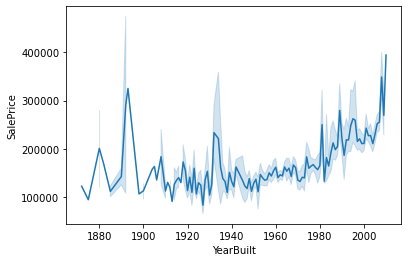

In [37]:
sns.lineplot(y='SalePrice', x = 'YearBuilt', data=train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

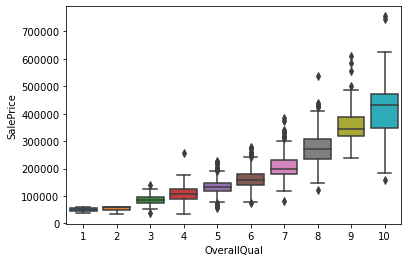

In [38]:
sns.boxplot(y='SalePrice', x = 'OverallQual', data=train)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

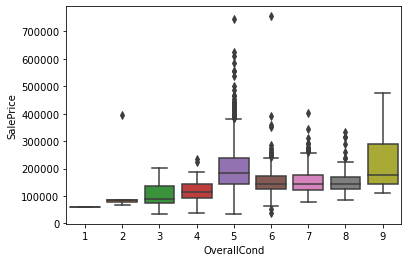

In [39]:
sns.boxplot(y='SalePrice', x = 'OverallCond', data=train)

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

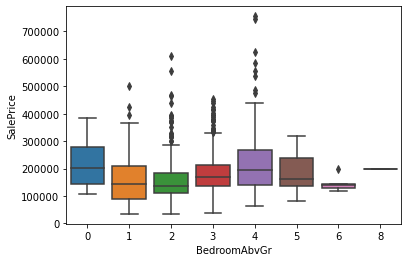

In [40]:
sns.boxplot(y='SalePrice', x = 'BedroomAbvGr', data=train)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

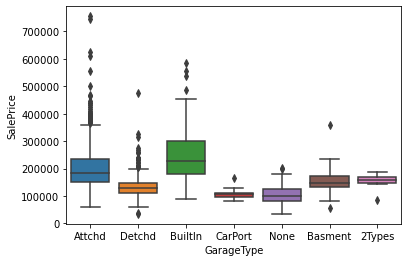

In [41]:
sns.boxplot(y='SalePrice', x = 'GarageType', data=train)

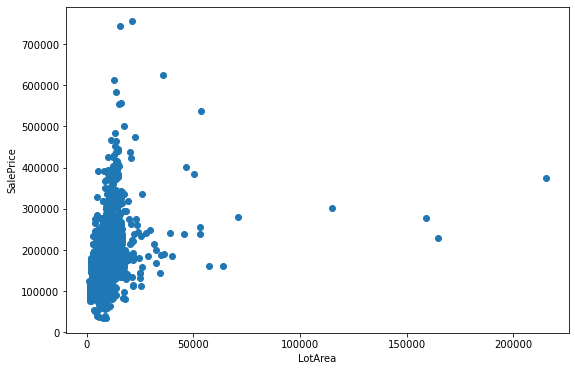

In [42]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(train['LotArea'], train['SalePrice'])
ax.set_ylabel('SalePrice')
ax.set_xlabel('LotArea')
plt.show()

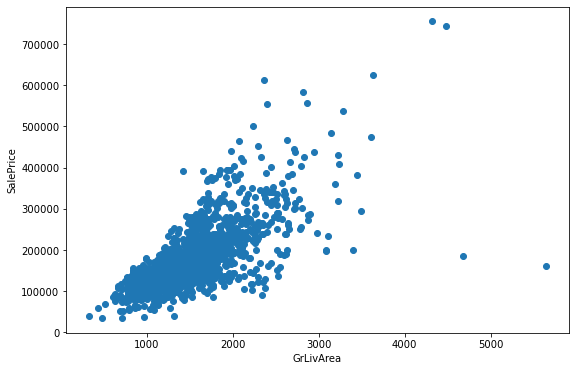

In [43]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(train['GrLivArea'], train['SalePrice'])
ax.set_ylabel('SalePrice')
ax.set_xlabel('GrLivArea')
plt.show()

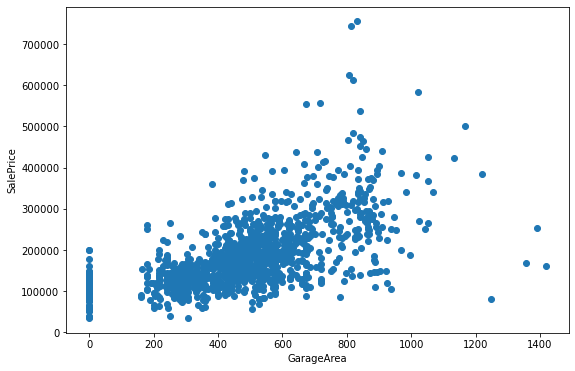

In [44]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(train['GarageArea'], train['SalePrice'])
ax.set_ylabel('SalePrice')
ax.set_xlabel('GarageArea')
plt.show()

In [45]:
corr = train.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
MSSubClass,1.000,-0.140,0.033,-0.059,0.028,0.041,0.024,-0.070,-0.066,-0.141,-0.239,-0.252,0.308,0.046,0.075,0.003,-0.002,0.132,0.177,-0.023,0.282,0.040,-0.046,-0.040,-0.099,-0.013,-0.006,-0.012,-0.044,-0.026,0.008,-0.008,-0.021,-0.084
LotArea,-0.140,1.000,0.106,-0.006,0.014,0.014,0.103,0.214,0.111,-0.003,0.261,0.299,0.051,0.005,0.263,0.158,0.048,0.126,0.014,0.120,-0.018,0.190,0.271,0.155,0.180,0.172,0.085,-0.018,0.020,0.043,0.078,0.038,-0.014,0.264
OverallQual,0.033,0.106,1.000,-0.092,0.572,0.551,0.407,0.240,-0.059,0.308,0.538,0.476,0.295,-0.030,0.593,0.111,-0.040,0.551,0.273,0.102,-0.184,0.427,0.397,0.601,0.562,0.239,0.309,-0.114,0.030,0.065,0.065,-0.031,-0.027,0.791
OverallCond,-0.059,-0.006,-0.092,1.000,-0.376,0.074,-0.126,-0.046,0.040,-0.137,-0.171,-0.144,0.029,0.025,-0.080,-0.055,0.118,-0.194,-0.061,0.013,-0.087,-0.058,-0.024,-0.186,-0.152,-0.003,-0.033,0.070,0.026,0.055,-0.002,0.069,0.044,-0.078
YearBuilt,0.028,0.014,0.572,-0.376,1.000,0.593,0.312,0.250,-0.049,0.149,0.391,0.282,0.010,-0.184,0.199,0.188,-0.038,0.468,0.243,-0.071,-0.175,0.096,0.148,0.538,0.479,0.225,0.189,-0.387,0.031,-0.050,0.005,-0.034,-0.014,0.523
YearRemodAdd,0.041,0.014,0.551,0.074,0.593,1.000,0.177,0.128,-0.068,0.181,0.291,0.240,0.140,-0.062,0.287,0.119,-0.012,0.439,0.183,-0.041,-0.150,0.192,0.113,0.421,0.372,0.206,0.226,-0.194,0.045,-0.039,0.006,-0.010,0.036,0.507
MasVnrArea,0.024,0.103,0.407,-0.126,0.312,0.177,1.000,0.261,-0.071,0.114,0.360,0.340,0.174,-0.069,0.388,0.083,0.027,0.273,0.199,0.103,-0.038,0.280,0.247,0.362,0.371,0.160,0.123,-0.110,0.019,0.062,0.012,-0.030,-0.008,0.473
BsmtFinSF1,-0.070,0.214,0.240,-0.046,0.250,0.128,0.261,1.000,-0.050,-0.495,0.522,0.446,-0.137,-0.065,0.208,0.649,0.067,0.059,0.004,-0.107,-0.081,0.044,0.260,0.224,0.297,0.204,0.112,-0.102,0.026,0.062,0.140,0.004,0.014,0.386
BsmtFinSF2,-0.066,0.111,-0.059,0.040,-0.049,-0.068,-0.071,-0.050,1.000,-0.209,0.105,0.097,-0.099,0.015,-0.010,0.159,0.071,-0.076,-0.032,-0.016,-0.041,-0.035,0.047,-0.038,-0.018,0.068,0.003,0.037,-0.030,0.089,0.042,0.005,0.032,-0.011
BsmtUnfSF,-0.141,-0.003,0.308,-0.137,0.149,0.181,0.114,-0.495,-0.209,1.000,0.415,0.318,0.004,0.028,0.240,-0.423,-0.096,0.289,-0.041,0.167,0.030,0.251,0.052,0.214,0.183,-0.005,0.129,-0.003,0.021,-0.013,-0.035,-0.024,-0.041,0.214


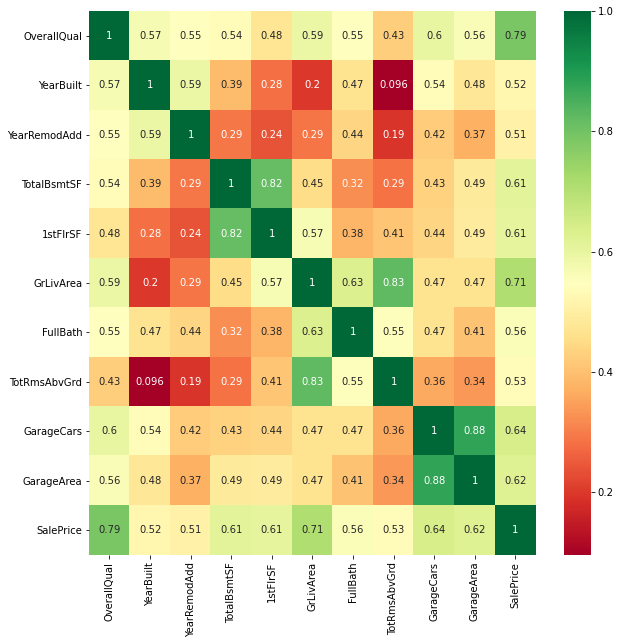

In [46]:
corr = train.corr()
high_corr = corr.index[abs(corr["SalePrice"]) > 0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[high_corr].corr(),annot=True,cmap="RdYlGn")

C:\Users\eltac.babanli\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


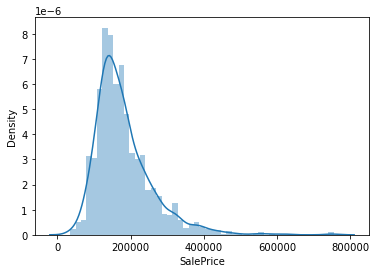

In [47]:
 sns.distplot(train['SalePrice']);

In [48]:
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,0,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,0,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2,608,TA,TA,Y,0,42,0,0,0,0,0,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,3,642,TA,TA,Y,0,35,272,0,0,0,0,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,3,836,TA,TA,Y,192,84,0,0,0,0,0,2008,WD,Normal,250000


In [49]:
# Checking categorical variables
categorical_train = []
for col in train.columns:
     if train[col].dtype=="O":
            categorical_train.append(col)

In [50]:
# Checking non-categorical variables
non_categorical_train = []
for col in train.columns:
     if train[col].dtype!="O":
            non_categorical_train.append(col)

In [51]:
# Checking categorical variables
categorical_test = []
for col in test.columns:
     if test[col].dtype=="O":
            categorical_test.append(col)

In [52]:
# Checking non-categorical variables
non_categorical_test = []
for col in test.columns:
     if test[col].dtype!="O":
            non_categorical_test.append(col)

In [53]:
train[categorical_train].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,Y,WD,Normal


In [54]:
test[categorical_test].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,TA,TA,Y,WD,Normal


In [55]:
# We create dummy variables for all the categorical variables in train dataset
df_train = train[categorical_train].apply(LabelEncoder().fit_transform)

In [56]:
# We create dummy variables for all the categorical variables in test dataset
df_test = test[categorical_test].apply(LabelEncoder().fit_transform)

In [57]:
df_train.shape

(1460, 37)

In [58]:
df_test.shape

(1459, 37)

In [59]:
df_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,1,5,5,2,8,4
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,1,5,5,2,8,4
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,1,5,5,2,8,4
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,5,5,5,2,8,0
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,1,5,5,2,8,4


In [60]:
df_test.shape

(1459, 37)

In [61]:
df_train = df_train.join(train[non_categorical_train], how='left')

In [62]:
df_test = df_test.join(test[non_categorical_test], how='left')

In [63]:
df_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,3,2,6,1,0,1,4,2,6,1,5,5,2,8,4,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2008,208500
1,3,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,1,5,5,2,8,4,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,2007,181500
2,3,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,1,5,5,2,8,4,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,2008,223500
3,3,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,3,0,6,1,2,1,4,2,6,5,5,5,2,8,0,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2006,140000
4,3,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,1,5,5,2,8,4,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,2008,250000


In [64]:
df_test.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,2,1,3,3,0,4,0,12,1,2,0,2,1,0,10,12,2,3,4,1,4,4,3,5,3,0,4,1,3,3,6,1,4,5,2,8,4,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010
1,3,1,0,3,0,0,0,12,2,2,0,2,3,0,11,13,1,3,4,1,4,4,3,0,6,0,4,1,3,2,6,1,4,5,2,8,4,20,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010
2,3,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,2,3,4,2,2,4,3,2,6,0,2,1,3,3,6,1,4,5,2,8,4,60,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010
3,3,1,0,3,0,4,0,8,2,2,0,4,1,0,10,12,1,3,4,2,4,4,3,2,6,0,0,1,3,2,6,1,4,5,2,8,4,60,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,2010
4,3,1,0,1,0,4,0,22,2,2,4,2,1,0,6,6,2,2,4,2,2,4,3,0,6,0,0,1,3,2,6,1,4,5,2,8,4,120,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,2010


In [65]:
df_train.shape

(1460, 71)

In [66]:
df_test.shape

(1459, 70)

In [67]:
x_test = df_test.copy()
x = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [68]:
import xgboost as XGB

In [69]:
model = XGB.XGBRegressor(learning_rate=0.01,n_estimators=3000,
                                     max_depth=4, min_child_weight=0,
                                     gamma=0, subsample=0.6,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
model.fit(x,y)

[10:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=3000, n_jobs=6, nthread=-1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=27, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.6, tree_method='exact', validate_parameters=1, ...)

In [70]:
from sklearn.ensemble import RandomForestRegressor
modelRFR = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
modelRFR.fit(x, y)

RandomForestRegressor(max_depth=30, n_estimators=2000, random_state=0)

In [72]:
pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), 
                     "SalePrice":model.predict(x_test)}).set_index('Id').to_csv('kaggle_house_prices2.csv')